# Customer Service: Dataset preparation

In [136]:
# Import our dependencies
import pandas as pd 
import numpy as np
import logging 
import random


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import sqlalchemy
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder



# Import our input dataset
cus_service_df = pd.read_csv('archives_of_ontario_customer_service_stats_2010-2020.csv')
cus_service_df.head()

,Fiscal Year,Month,Total Telephone Inquiries,Total Correspondence,Total Onsite Users,Total Items Retrieved,Total Microfilm Reels Shipped,Total Reproductions,Total Certifications
0,2019-2020,April,1094,825,384,1809,148,120,42
1,2019-2020,May,1454,877,559,1867,45,187,52
2,2019-2020,June,1124,720,516,1936,55,134,36
3,2019-2020,July,1587,846,480,1917,61,167,42
4,2019-2020,August,1214,721,393,1142,60,167,71


In [137]:
# Define the columns
cus_service_df.columns

Index(['Fiscal Year', 'Month', 'Total Telephone Inquiries',
       'Total Correspondence', 'Total Onsite Users', 'Total Items Retrieved',
       'Total Microfilm Reels Shipped', 'Total Reproductions',
       'Total Certifications'],
      dtype='object')

In [138]:
#Describe the column
cus_service_df.dtypes

Fiscal Year                      object
Month                            object
Total Telephone Inquiries         int64
Total Correspondence              int64
Total Onsite Users                int64
Total Items Retrieved             int64
Total Microfilm Reels Shipped     int64
Total Reproductions               int64
Total Certifications              int64
dtype: object

In [139]:
# Find null values
for column in cus_service_df.columns:
    print(f"Column {column} has {cus_service_df[column].isnull().sum()}null values")

Column Fiscal Year has 0null values
Column Month has 0null values
Column Total Telephone Inquiries has 0null values
Column Total Correspondence has 0null values
Column Total Onsite Users has 0null values
Column Total Items Retrieved has 0null values
Column Total Microfilm Reels Shipped has 0null values
Column Total Reproductions has 0null values
Column Total Certifications has 0null values


In [140]:
# Drop null rows
cus_service_df = cus_service_df.dropna()

In [141]:
# Find duplicate entries
print(f"Duplicate entries: {cus_service_df.duplicated().sum()}")

Duplicate entries: 0


In [142]:
# Remove the Month column
cus_service_df.drop(columns=["Fiscal Year","Month"], inplace=True)

cus_service_df.head()

,Total Telephone Inquiries,Total Correspondence,Total Onsite Users,Total Items Retrieved,Total Microfilm Reels Shipped,Total Reproductions,Total Certifications
0,1094,825,384,1809,148,120,42
1,1454,877,559,1867,45,187,52
2,1124,720,516,1936,55,134,36
3,1587,846,480,1917,61,167,42
4,1214,721,393,1142,60,167,71


In [143]:
# Describe the dataframe
cus_service_df.describe()

,Total Telephone Inquiries,Total Correspondence,Total Onsite Users,Total Items Retrieved,Total Microfilm Reels Shipped,Total Reproductions,Total Certifications
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1177.175000,747.841667,463.216667,1962.700000,219.275000,2358.550000,45.316667
std,205.554453,142.815800,117.321664,492.010087,137.065645,7040.572166,12.325408
min,636.000000,434.000000,208.000000,863.000000,24.000000,57.000000,21.000000
25%,1049.250000,654.500000,393.000000,1652.750000,123.250000,164.500000,38.000000
50%,1180.500000,732.000000,440.000000,1918.000000,189.000000,193.000000,43.500000
75%,1314.750000,834.500000,517.500000,2161.750000,280.000000,233.500000,52.000000
max,1675.000000,1156.000000,968.000000,3616.000000,774.000000,35041.000000,92.000000


In [144]:
cus_service_df.dtypes

Total Telephone Inquiries        int64
Total Correspondence             int64
Total Onsite Users               int64
Total Items Retrieved            int64
Total Microfilm Reels Shipped    int64
Total Reproductions              int64
Total Certifications             int64
dtype: object

In [145]:
# Rename the columns names
update_cus_service_df = cus_service_df.rename(columns = {'Total Telephone Inquiries': "TotalTelephoneInquiries", \
                                                         'Total Correspondence': 'TotalCorrespondence',
                                                         'Total Onsite Users': "TotalOnsiteUsers", 
                                                         'Total Items Retrieved': 'TotalItemsRetrieved', 
                                                         'Total Microfilm Reels Shipped': "TotalMicrofilmReelsShipped",\
                                                         'Total Reproductions': 'TotalReproductions', \
                                                         'Total Certifications': "TotalCertifications"}, inplace = False)
update_cus_service_df.head()

,TotalTelephoneInquiries,TotalCorrespondence,TotalOnsiteUsers,TotalItemsRetrieved,TotalMicrofilmReelsShipped,TotalReproductions,TotalCertifications
0,1094,825,384,1809,148,120,42
1,1454,877,559,1867,45,187,52
2,1124,720,516,1936,55,134,36
3,1587,846,480,1917,61,167,42
4,1214,721,393,1142,60,167,71


In [146]:
# Saving cleaned data to a new data frame
file_path = "New_customer_service.csv"
update_cus_service_df.to_csv(file_path, index=False)

# Data Exporation

In [147]:
# Checking Heart Disease Rates by age and gender

class_0 = update_cus_service_df.loc[update_cus_service_df['TotalCertifications'] <= 45]["TotalMicrofilmReelsShipped"]
class_1 = update_cus_service_df.loc[update_cus_service_df['TotalCertifications'] >= 45]["TotalMicrofilmReelsShipped"]

hist_data = [class_0, class_1]
group_labels = ['Under 45 ', 'Over 45']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Total Microfilm Reels Shipped compared to Total Cerifications', xaxis=dict(title='Total Microfilm Reels Shipped'))
iplot(fig, filename='dist_only')


In [148]:
# Let's plot the blood sugar levels(glucose) against age. 
# The age is shown in years from the start of the time period of the given dataset.

total_certifications = update_cus_service_df.loc[update_cus_service_df['TotalCertifications'] >= 45]

trace = go.Scatter(
    x = total_certifications['TotalCertifications'],y = total_certifications['TotalTelephoneInquiries'],
    name="Total Telephone Inquiries",
     marker=dict(
                color='rgb(238,23,11)',
                line=dict(
                    color='red',
                    width=1),
                opacity=0.5,
            ),
    text= total_certifications['TotalCertifications'],
    mode = "markers"
)
data = [trace]
layout = dict(title = 'Inquiries vs Certification',
          xaxis = dict(title = 'Certification [s]', showticklabels=True), 
          yaxis = dict(title = 'Telephone Inquiries'),
          hovermode='closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='inquiries_certifications')

# Define predictors and target values


In [149]:
# Let's define the predictor features and the target features. Categorical features, 
# if any, are also defined. In our case, there are no categorical feature.

from sklearn.ensemble import RandomForestClassifier

target = 'TotalTelephoneInquiries'
predictors = ['TotalCorrespondence', 'TotalOnsiteUsers',\
              'TotalItemsRetrieved', 'TotalMicrofilmReelsShipped', 'TotalReproductions','TotalCertifications']


# Split training/test datasets

In [150]:
train_df, test_df = train_test_split(update_cus_service_df, test_size=0.4, random_state=45, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.4, random_state=45, shuffle=True )

# Create a Randomforest classifier.

In [151]:
# Initializing the RandomForest Classifier.
clf = RandomForestClassifier(n_jobs=5, 
                             random_state=45,
                             criterion='gini',
                             n_estimators=5,
                             verbose=False)

In [152]:
# Training the RandomForest Classifier using the train_df data and fit function.
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_estimators=5, n_jobs=5, random_state=45, verbose=False)

In [153]:
# Predicting the target values for the valid_df data, using predict function.
preds = clf.predict(valid_df[predictors])

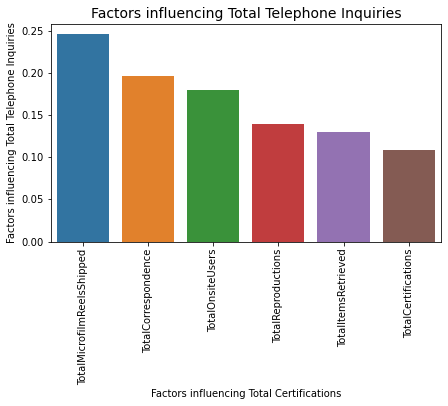

In [154]:
# Visualizing the Factors influencing Ten Year CHD
tmp = pd.DataFrame({'Factors influencing Total Certifications': predictors, 'Factors influencing Total Telephone Inquiries': clf.feature_importances_})
tmp = tmp.sort_values(by='Factors influencing Total Telephone Inquiries',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Factors influencing Total Telephone Inquiries',fontsize=14)
s = sns.barplot(x='Factors influencing Total Certifications',y='Factors influencing Total Telephone Inquiries',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [155]:
# Calculate the ROC-AUC score. The area under curve
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from collections import Counter

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)

ran_for = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
print(ran_for)

0.9913333333333334


# The roc_auc_score obtained with RandomForrestClassifier 0.99

# Support Vector Machine Vs. Deep Learning Model

In [156]:
# Generate our categorical variable list
TotalInquiries_cat = update_cus_service_df.dtypes[update_cus_service_df.dtypes == "int64"].index.tolist()


# Check the number of unique values in each column
update_cus_service_df[TotalInquiries_cat].nunique()

TotalTelephoneInquiries       111
TotalCorrespondence           103
TotalOnsiteUsers               96
TotalItemsRetrieved           115
TotalMicrofilmReelsShipped    104
TotalReproductions             88
TotalCertifications            45
dtype: int64

In [157]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_cus_service_df = pd.DataFrame(enc.fit_transform(update_cus_service_df[TotalInquiries_cat]))

# Add the encoded variable names to the dataframe
encode_cus_service_df.columns = enc.get_feature_names(TotalInquiries_cat)
encode_cus_service_df.head()

C:\Users\Judy\miniconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,TotalTelephoneInquiries_636,TotalTelephoneInquiries_743,TotalTelephoneInquiries_745,TotalTelephoneInquiries_787,TotalTelephoneInquiries_788,TotalTelephoneInquiries_798,TotalTelephoneInquiries_839,TotalTelephoneInquiries_840,TotalTelephoneInquiries_861,TotalTelephoneInquiries_878,...,TotalCertifications_59,TotalCertifications_61,TotalCertifications_68,TotalCertifications_70,TotalCertifications_71,TotalCertifications_72,TotalCertifications_73,TotalCertifications_76,TotalCertifications_81,TotalCertifications_92
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# Remove status target from features data
y = encode_cus_service_df.TotalCertifications_40.values
X = encode_cus_service_df.drop(columns=["TotalCertifications_21","TotalCertifications_40"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [159]:
# Create the SVM model
svm = SVC(kernel='linear')

In [160]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [161]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.967


# Support Vector Machine
SVM model accuracy: 0.967

# Deep Learning Model

In [162]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [163]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=25) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/25
3/3 [==============================] - 1s 3ms/step - loss: 0.8151 - accuracy: 0.1778
Epoch 2/25
3/3 [==============================] - 0s 4ms/step - loss: 0.7752 - accuracy: 0.2222
Epoch 3/25
3/3 [==============================] - 0s 4ms/step - loss: 0.7440 - accuracy: 0.3222
Epoch 4/25
3/3 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.3778
Epoch 5/25
3/3 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4889
Epoch 6/25
3/3 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5556
Epoch 7/25
3/3 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6444
Epoch 8/25
3/3 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.7111
Epoch 9/25
3/3 [==============================] - 0s 3ms/step - loss: 0.6406 - accuracy: 0.7222
Epoch 10/25
3/3 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.8444
Epoch 11/25
3/3 [======================

# Deep Learning Model
Loss: 0.48, Accuracy: 0.97

In [164]:
model_evaluation = pd.DataFrame({'Model': ['Random Forest','Support Vector Machine','Deep Learning Model'], 'Accuracy': [ran_for*100,
                    accuracy_score(y_test,y_pred)*100,model_accuracy*100]})
model_evaluation

,Model,Accuracy
0,Random Forest,99.133333
1,Support Vector Machine,96.666667
2,Deep Learning Model,96.666664
